## A least Square Regression Analysis Example - LeastSquareReg vs. scikit-learn
#### Housing dataset
The housing dataset used in this demo is downloaded from [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Housing). There are 506 samples in the dataset, each sample comes with 14 attributes. A more detailed dataset variable explaination can be found at its download page at UCI Machine Learning Repo.
#### Data Loading
Data loading and manipulation is performed using python [pandas library](http://pandas.pydata.org)
#### Data Partitioning
Data partitioning is performed using python [sciki-learn library](http://scikit-learn.org/stable/) cross_validation
#### Regression Analysis
Regression analysis is performed both using python [scikit-learn library](http://scikit-learn.org/table/) and the self-written LeastSquareReg class
#### Others
This regression analysis example is developed under python 2.7 environment. [Numpy](http://www.numpy.org) and [matplotlib](http://matplotlib.org/) are used for constructing data matrix and making plots.

### Load and partition data

In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("housing.data.txt", delim_whitespace=True, header=None)
## rename columns
dataset.columns = ['crimeRate', 'zoneProp', 'indProp', 'boundRiver', 'nox', 'roomNum',
                  'age','dist','radToHW','tax','teachRatio','bkProp','lowStat','medValue'];
dataset.head(3)

,crimeRate,zoneProp,indProp,boundRiver,nox,roomNum,age,dist,radToHW,tax,teachRatio,bkProp,lowStat,medValue
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [6]:
## partition data into train : test = 0.7 : 0.3
from sklearn import cross_validation
train, test = cross_validation.train_test_split(dataset, test_size=0.3,random_state = 321)

### Exploratory analysis

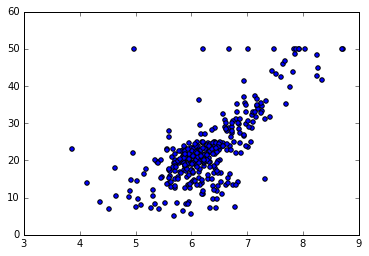

In [8]:
## Explore trend between roomNum and response variable
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(train.roomNum, train.medValue)
plt.show()

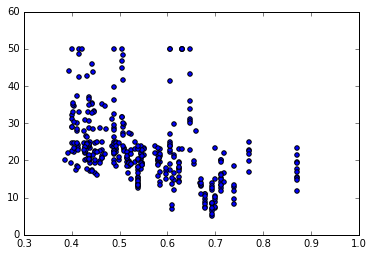

In [15]:
## Explore trend between NOx (air quality) and response variable
plt.scatter(train.nox, train.medValue)
plt.show()

### Build a regression model upon training set using scikit-learn 
Build a regression model to predict medValue using roomNum and NOx concentration
* explainatory variables: roomNum, NOx
* response variable: medValue

#### Build model on training set

In [22]:
from sklearn.linear_model import LinearRegression
X = train[['roomNum','nox']]
y = train['medValue']
y = np.reshape(y,(-1,1)) ## reshape y from 1D array into 2D array

In [25]:
## Fit linear model
mod1 = LinearRegression()
mod1.fit(X,y)
print('Coefficients: \n', mod1.coef_)

('Coefficients: \n', array([[  8.66565437, -17.20552189]]))


In [27]:
## Compute Residual Sum of Squares on training set
print mod1.residues_

[ 13795.92676835]


#### Evaluate Model on testing set

### Build a regression model upon training set using LeastSquareReg
#### Build model on training set

In [39]:
import leastSquareReg as lsr
from leastSquareReg import DimensionMismatch
from leastSquareReg import GradientDescentError
mod2 = lsr.LeastSquare(X, y)
## closed form soluton: normal function
mod2_coef1 = mod2.normFunc()
print "coeffecients computed using normal function: ", mod2_coef1

coeffecients computed using normal function:  [[-22.25928662]
 [  8.66565437]
 [-17.20552189]]


In [60]:
## batch gradient descent solution
mod2_coef2, mod2_costs = mod2.gradientDescent(step=1e-5)
print "coefficients computed using gradient descent: ", mod2_coef2

coefficients computed using gradient descent:  [[-22.2589942 ]
 [  8.66562475]
 [-17.20571187]]


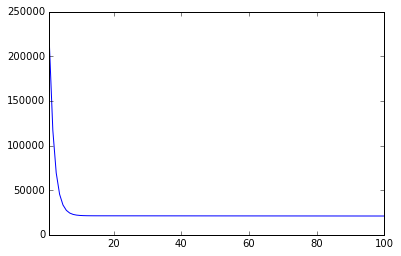

In [74]:
plt.plot(range(1,len(mod2_costs)+1), mod2_costs)
plt.xlim([1, 100])
plt.show()

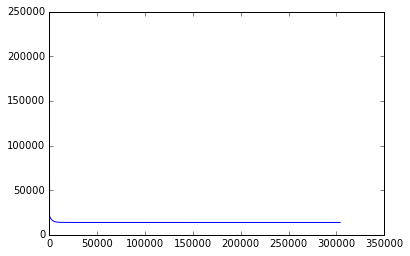

In [62]:
mod2.visulizeCosts()

In [61]:
## compute residual sum of squares
rss1 = mod2.compRSS(estimator='NormalFunction')
print "residual sum of squares using normal solution: ", rss1
rss2 = mod2.compRSS(estimator='GradientDescent')
print "residual sum of squares using gradient descent: ", rss2

residual sum of squares using normal solution:  13795.9267683
residual sum of squares using gradient descent:  13795.9267686


#### Evaluate Model on testing set

### Summary

* There are two computational solutions for solving regression models implemented in LeastSquare class: 1) closed form solution - normal function; 2) batch gradient descent. Both of the solvers resulted in the same model coeffients as performing regression analysis using scikit-learn library.
* In the matter of time performance, closed form solution is more efficient than batch gradient descent when facing easily solvalbe formulas. Optimized solver in scikit-learn is more efficient than self implemented batch gradient descent in LeastSquare class
* Self-implemented batch gradient descent requires a manual setting of step size, which depends on the natural of the data and requires a few trial runs.
* visulizeCosts function in LeastSquare class demonstrates how the costs decreases over the increase of iterations